## Problem Statement

Identifying different features related to legitimate and phishy websites, data from 1353 different websites from difference sources was collected. When a website is considered 'Suspicious' that means it can be either phishy or legitimate, meaning the website held some legit and phishy features. The values are encoded as follows :

1 : Legitimate

0 : Suspicious

-1 : Phishy

Build a Classifier to predict whether a Website is either Legitimate or Suspicious or Phishy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, plot_confusion_matrix

import pickle

In [2]:
data = pd.read_csv('Website Phishing.csv')
data.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [3]:
df = data.copy()
df.shape

(1353, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


### No null values present within the dataset
### No features with dtype = 'object'

## Correlation Heatmap

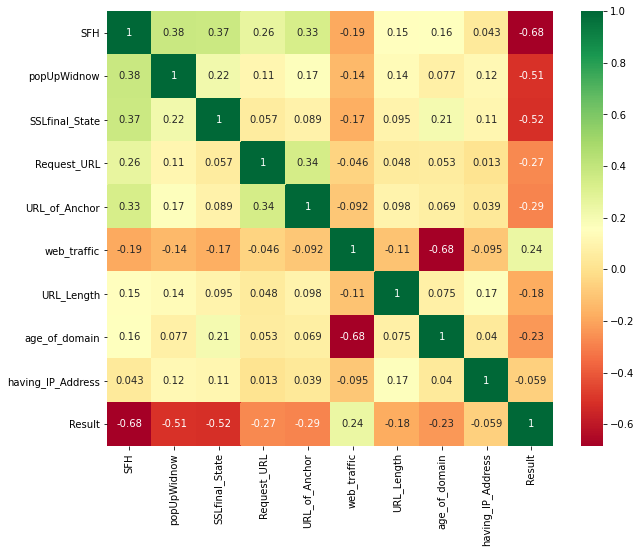

In [5]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

### There isn't enough correlation among the input features in order to drop any

In [6]:
# 3 O/P classes
df['Result'].unique()

array([ 0,  1, -1], dtype=int64)

In [7]:
# We can clearly see a case of an Imbalanced Dataset here

df['Result'].value_counts()

-1    702
 1    548
 0    103
Name: Result, dtype: int64

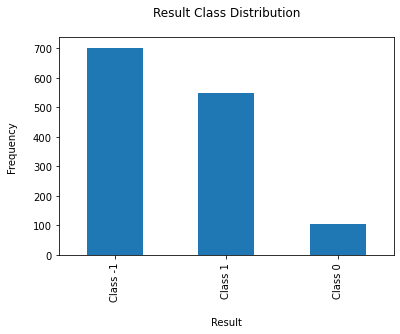

In [8]:
# Visualizing the Imbalance nature of the dataset

Labels = ["Class -1", "Class 1", "Class 0"]

count_classes = df['Result'].value_counts()

count_classes.plot(kind = 'bar')

plt.title("Result Class Distribution\n")
plt.xticks([0, 1, 2], Labels)
plt.xlabel("\nResult")
plt.ylabel("Frequency\n")
plt.show()

### There is an imbalanceness present within the dataset which needs to be handled

## Train-Test Split

In [9]:
X = df.drop(['Result'], axis=1)

In [10]:
X.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
0,1,-1,1,-1,-1,1,1,1,0
1,-1,-1,-1,-1,-1,0,1,1,1
2,1,-1,0,0,-1,0,-1,1,0
3,1,0,1,-1,-1,0,1,1,0
4,-1,-1,1,-1,0,0,-1,1,0


In [11]:
y = df['Result']
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Result, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
y_train.value_counts()

-1    474
 1    364
 0     68
Name: Result, dtype: int64

In [14]:
y_test.value_counts()

-1    228
 1    184
 0     35
Name: Result, dtype: int64

### Performing OverSampling using RandomOverSampler() method from imblearn library

In [15]:
sampler = RandomOverSampler()

### Resampling separately for Train data & Test data, in order to avoid Data Leakage

In [16]:
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

In [17]:
y_train_resampled.value_counts()

-1    474
 1    474
 0    474
Name: Result, dtype: int64

In [18]:
X_test_resampled, y_test_resampled = sampler.fit_resample(X_test, y_test)

In [19]:
y_test_resampled.value_counts()

 0    228
 1    228
-1    228
Name: Result, dtype: int64

### As the dataset contains only the values: -1, 0 & 1, there isn't any need to perform Feature Scaling

## Model Building

## 1. Logistic Regression

In [20]:
log = LogisticRegression()

In [21]:
log_model = log.fit(X_train_resampled, y_train_resampled)

In [22]:
log_model.score(X_test_resampled, y_test_resampled)

0.7383040935672515

## 2. KNN

In [23]:
knn = KNeighborsClassifier()

In [24]:
knn_model = knn.fit(X_train_resampled, y_train_resampled)

In [25]:
knn_model.score(X_test_resampled, y_test_resampled)

0.8771929824561403

## 3. SVC

In [26]:
svc = SVC()

In [27]:
svc_model = svc.fit(X_train_resampled, y_train_resampled)

In [28]:
svc_model.score(X_test_resampled, y_test_resampled)

0.8771929824561403

## Tuning the Hyperparameters of SVC model

In [29]:
params = {
    'C': [0.1, 1.0, 10, 100, 150, 200], 
    'gamma': ['scale', 'auto']
} 

In [30]:
grid_search = GridSearchCV(svc, params, cv=5, n_jobs=-1)

In [31]:
best_model = grid_search.fit(X_train_resampled, y_train_resampled)

In [32]:
best_model.score(X_test_resampled, y_test_resampled)

0.8713450292397661

In [33]:
best_model.best_estimator_

SVC(C=100)

In [34]:
best_model.best_params_

{'C': 100, 'gamma': 'scale'}

### Seems that the model without Hyperparameter Tuning is slightly better

In [35]:
best_model = svc_model

## Model Performance

In [36]:
y_pred = best_model.predict(X_test_resampled)

In [37]:
print("Classification Report: \n\n", classification_report(y_test_resampled, y_pred))

Classification Report: 

               precision    recall  f1-score   support

          -1       0.87      0.89      0.88       228
           0       0.93      0.86      0.90       228
           1       0.83      0.88      0.86       228

    accuracy                           0.88       684
   macro avg       0.88      0.88      0.88       684
weighted avg       0.88      0.88      0.88       684



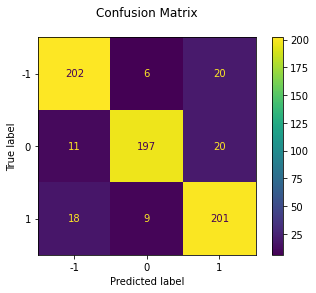

In [38]:
plot_confusion_matrix(best_model, X_test_resampled, y_test_resampled)
plt.title('Confusion Matrix\n')
plt.show()

## Saving (Dumping) the model

In [39]:
# open a file, where you want to store the data
file = open('website_phishing_svc.pkl', 'wb')

# dump information to that file
pickle.dump(best_model, file)

In [40]:
model = open('website_phishing_svc.pkl', 'rb')

## Predictions

In [41]:
test_data = X_test_resampled.head()
test_data

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
0,1,1,-1,-1,1,-1,1,1,0
1,-1,-1,0,-1,-1,1,-1,-1,0
2,1,0,1,-1,1,-1,0,1,0
3,1,0,1,1,1,-1,0,1,0
4,-1,-1,1,-1,-1,0,0,1,0


In [46]:
y_test_resampled.head()

0    0
1    1
2   -1
3   -1
4    1
Name: Result, dtype: int64

In [42]:
best_model.predict(test_data)

array([ 0,  1, -1, -1,  1], dtype=int64)

In [43]:
lst1 = [1,1,-1,-1,1,-1,1,1,0]

In [44]:
best_model.predict([[1,1,-1,-1,1,-1,1,1,0]])

array([0], dtype=int64)